In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import EIANN.plot as pt
pt.update_plot_defaults()

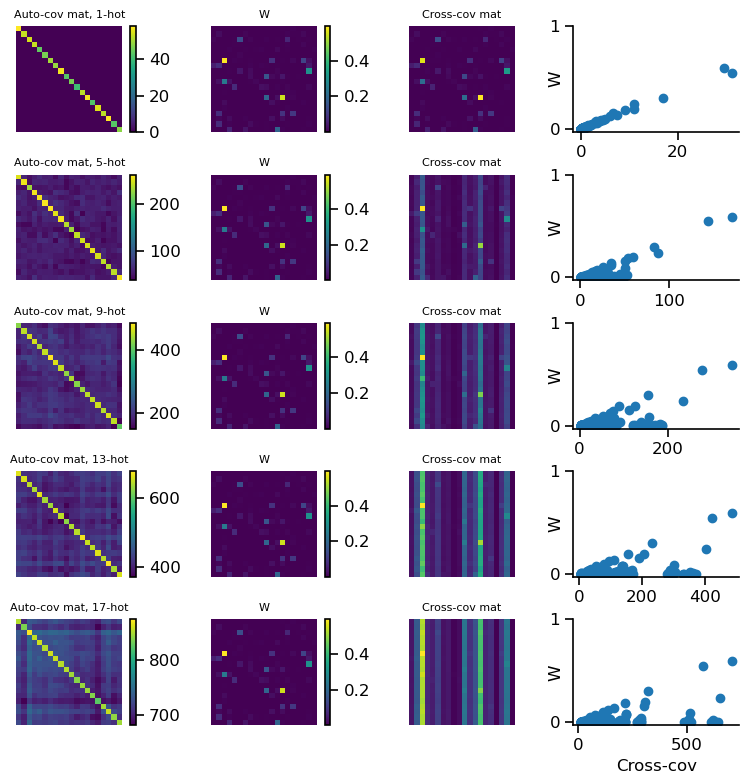

In [12]:
num_samples = 1000
dim = 20

torch.manual_seed(123)
W = torch.empty((dim, dim)).log_normal_(mean=1, std=2.5)
# W = torch.empty((dim, dim)).normal_(mean=1, std=2)
# W = torch.empty((dim, dim)).uniform_(0, 1)
W = W / W.norm()

n_vals = list(range(1, 21, 4))
fig, axes = plt.subplots(len(n_vals), 4, figsize=(8, 8))
for i,n in enumerate(n_vals):
    # Data = n-hot encoded
    X = torch.zeros((num_samples, dim))
    for s in range(num_samples):
        X[s, np.random.choice(dim, n, replace=False)] = 1

    # # Random data
    # X = torch.randn((num_samples, dim))

    Y = X @ W

    # Covariance matrix between a and b
    m = X.shape[0]  # Number of data points (rows)
    auto_cov_matrix = (X.T @ X) #/ (m - 1)

    # Cross-covariance matrix between a and b
    cross_cov_matrix = (X.T @ Y) #/ (m - 1)

    ax = axes[i,0]
    im = ax.imshow(auto_cov_matrix)
    fig.colorbar(im, ax=ax)
    ax.set_title(f'Auto-cov mat, {n}-hot', fontsize=8)
    ax.axis('off')

    ax = axes[i, 1]
    im = ax.imshow(W)
    fig.colorbar(im, ax=ax)
    ax.set_title('W', fontsize=8)
    ax.axis('off')

    ax = axes[i, 2]
    im = ax.imshow(cross_cov_matrix)
    # fig.colorbar(im, ax=ax)
    ax.set_title('Cross-cov mat', fontsize=8)
    ax.axis('off')

    ax = axes[i, 3]
    ax.scatter(cross_cov_matrix.flatten(), W.flatten())
    ax.set_ylabel('W', labelpad=-10)
    ax.set_yticks([0, 1])
    if i == len(n_vals) - 1:
        ax.set_xlabel('Cross-cov')

plt.tight_layout(w_pad=0., h_pad=0.5)
plt.show()

intrinsic dimensionality: 17 for 90% variance


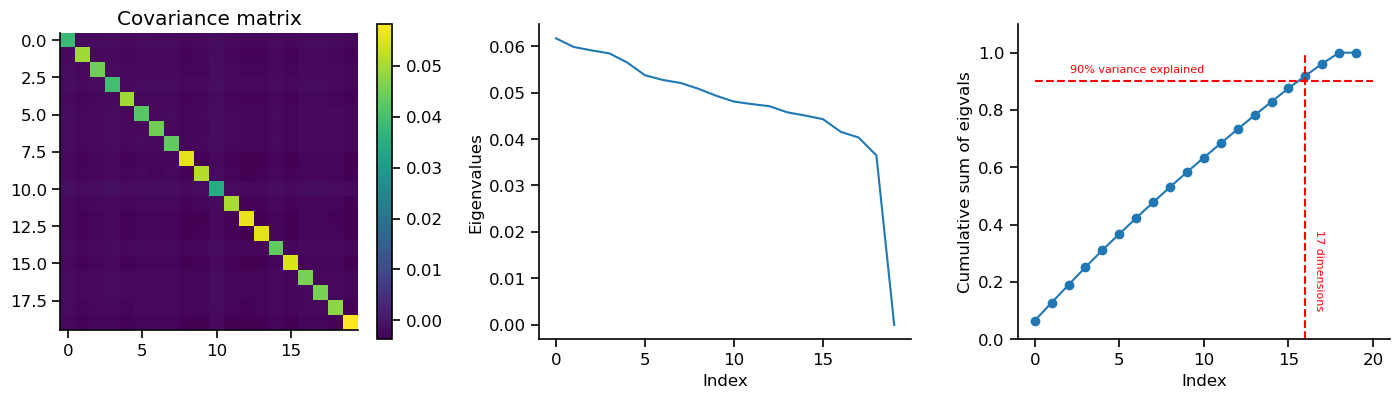

In [13]:
num_samples = 1000
dim = 20

# Data = n-hot encoded
X = torch.zeros((num_samples, dim))
n = 1
for s in range(num_samples):
    X[s, np.random.choice(dim, n, replace=False)] = 1

# X = torch.empty((num_samples, dim)).log_normal_(mean=1, std=2.5)
# X = torch.empty((num_samples, dim)).normal_(mean=1, std=2)
# X = torch.empty((num_samples, dim)).uniform_(0, 1)

# # make an example low-rank matrix:
# X = X @ W.T

# Get sorted eigenvalues
cov = np.cov(X.T)
# cov = np.eye(dim)

eigvals, eigvecs = np.linalg.eig(cov)
eigvals = np.sort(eigvals)[::-1]
eigvals = np.abs(eigvals)

threshold = 90 # Percentage of variance to keep
cumsum = np.cumsum(eigvals) / np.sum(eigvals)
idx = np.where(cumsum >= (threshold/100))[0][0]
print(f"intrinsic dimensionality: {idx+1} for {threshold}% variance")

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
ax = axes[0]
im = ax.imshow(cov)
fig.colorbar(im, ax=ax)
ax.set_title('Covariance matrix')
ax = axes[1]
ax.plot(eigvals)
ax.set_ylabel('Eigenvalues')
ax.set_xlabel('Index')
ax = axes[2]
ax.plot(cumsum, marker='o')
ax.set_ylim(0, 1.1)
ax.hlines(threshold / 100, 0, len(eigvals), 'r', '--')
ax.vlines(idx, 0, 1, 'r', '--')
ax.text(10, threshold/100+0.03, f'{threshold}% variance explained', fontsize=8, ha='right', color='r')
ax.text(idx+0.5, 0.1, f'{idx+1} dimensions', fontsize=8, va='bottom', rotation=-90, color='r')
ax.set_ylabel('Cumulative sum of eigvals')
ax.set_xlabel('Index')
plt.tight_layout()
plt.show()
